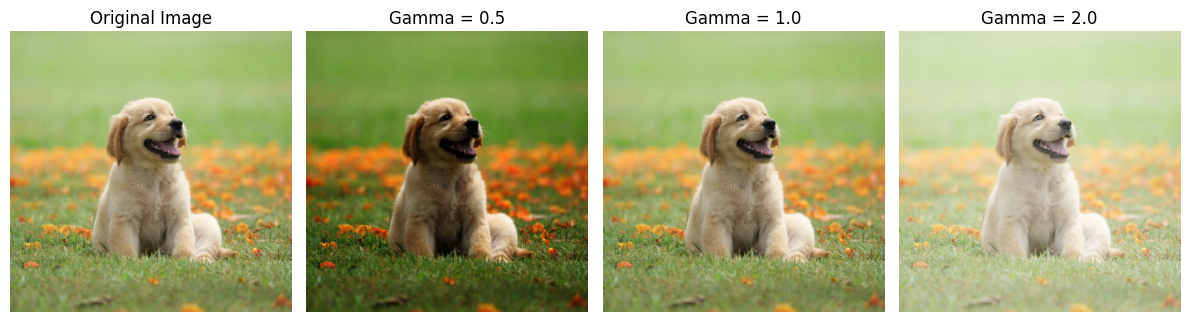

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


def GammaCorrection(image, gamma):
    # Normalize the image to [0, 1]
    Normalimg = image / 255.0

    # Apply gamma correction
    Gcorrected = np.power(Normalimg, 1 / gamma)

    # Scale up to [0, 255] and convert to uint8
    Scaledimg = np.array(Gcorrected * 255, dtype=np.uint8)

    return Scaledimg


# Load the image
path = "img.png"  # Update this path as needed
img = cv.imread(path)

# Convert from BGR to RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Gamma values for testing
gammas = [0.5, 1.0, 2.0]  # Brightening with gamma < 1 and darkening with gamma > 1

# Apply gamma correction and display results
plt.figure(figsize=(12, 6))

plt.subplot(1, len(gammas) + 1, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

for i, gamma in enumerate(gammas):
    corrected_img = GammaCorrection(img_rgb, gamma)
    plt.subplot(1, len(gammas) + 1, i + 2)
    plt.title(f'Gamma = {gamma}')
    plt.imshow(corrected_img)
    plt.axis('off')

plt.tight_layout()
plt.show()

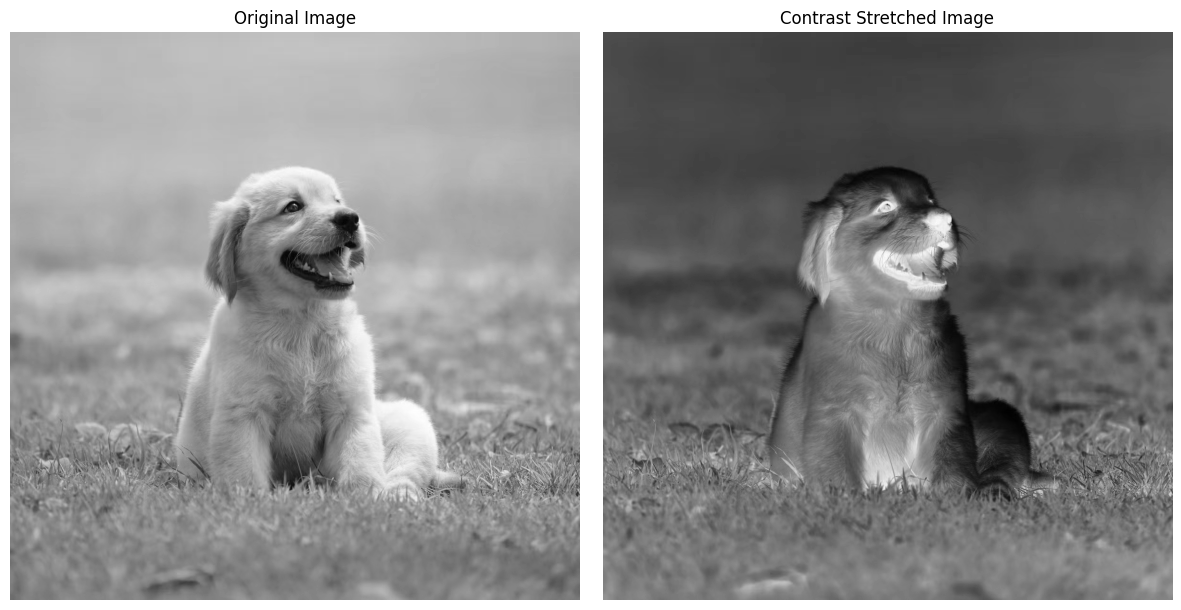

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def contrast_stretching(image):
    # Step 1: Identify input intensity range
    imin = np.min(image)
    imax = np.max(image)

    # Step 2: Define output intensity range (0 to 255 for an 8-bit image)
    pmin = 255
    pmax = 0

    # Step 3: Apply contrast stretching
    # Normalize the image to [0, 1]
    image_normalized = (image - imin) / (imax - imin)

    # Stretch the pixel values to the range [0, 255]
    image_stretched = image_normalized * ( pmax - pmin ) + pmin

    # Convert the image to uint8 type
    image_stretched = np.array(image_stretched, dtype=np.uint8)

    return image_stretched

# Load the image
path = "img.png"  # Update this path as needed
img = cv.imread(path, cv.IMREAD_GRAYSCALE)  # Load as grayscale for simplicity

# Apply contrast stretching
stretched_img = contrast_stretching(img)

# Display the original and contrast-stretched images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contrast Stretched Image')
plt.imshow(stretched_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()